#           Anomaly Detection & Time Series |
#           Assignment

#Question 1:   What is Anomaly Detection? Explain its types (point, contextual, and
#collective anomalies) with examples.

#**Answer:**:- Anomaly Detection

Anomaly Detection is a technique used to identify data points or patterns that differ significantly from normal behavior in a dataset. These unusual observations are called anomalies or outliers.

**Types of Anomalies:**

**Point Anomaly**: A single data point that is very different from others, such as an unusually large bank transaction.

**Contextual Anomaly**: A data point that is abnormal in a specific context, like high temperature during winter.

**Collective Anomaly**: A group of data points that together show abnormal behavior, such as multiple login attempts in a short time.

#Question 2: Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of
#their approach and suitable use cases.

#**Answer:**-> Comparison of Isolation Forest, DBSCAN, and Local Outlier Factor

I**solation Forest:**
It detects anomalies by randomly partitioning data. Anomalies are isolated faster because they are few and different. It is suitable for large, high-dimensional datasets and fraud detection.

**DBSCAN:**
It is a density-based clustering algorithm that identifies anomalies as points that do not belong to any cluster. It is useful for spatial data and datasets with clusters of arbitrary shapes.

**Local Outlier Factor (LOF)**:
It detects anomalies by comparing the local density of a data point with its neighbors. Points with much lower density are considered outliers. It is suitable for detecting local anomalies in datasets with varying densities.

#Question 3: What are the key components of a Time Series? Explain each with one
example.

#**Answer:**:- Key Components of a Time Series

A time series is a sequence of data points collected over time. The main components of a time series are:

**Trend:**
The long-term upward or downward movement in data.
Example: Increase in monthly sales over several years.

**Seasonality:**
Regular patterns that repeat at fixed intervals.
Example: Higher ice-cream sales during summer months.

**Cyclical Component:**
Fluctuations that occur over a long period but not at fixed intervals.
Example: Economic growth and recession cycles.

**Irregular (Random) Component:**
Unpredictable variations caused by random events.
Example: Sudden drop in sales due to a natural disaster.

#Question 4: Define Stationary in time series. How can you test and transform a
#non-stationary series into a stationary one?

**#Answer:**:->

**Stationarity in Time Series**

A time series is said to be stationary if its statistical properties such as mean, variance, and autocorrelation remain constant over time.

**Testing Stationarity**

Visual inspection: Check if mean and variance change over time using plots.

Augmented Dickey-Fuller (ADF) test: A statistical test where a low p-value indicates stationarity.

KPSS test: Used to confirm stationarity by testing trend stability.

Transforming a Non-Stationary Series

Differencing: Subtracting previous values from current values to remove trend.

Log or power transformation: Stabilizes variance.

Detrending and seasonal adjustment: Removes trend and seasonality from data.

#Question 5: Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in
#terms of structure and application.

#Answer:- Difference Between AR, MA, ARIMA, SARIMA, and SARIMAX Models

**AR (Autoregressive):**

Uses past values of the time series to predict future values.
Application: Forecasting when data depends on its own past values.

**MA (Moving Average):**
Uses past error terms to model the time series.
Application: Useful for smoothing short-term fluctuations.

**ARIMA (Autoregressive Integrated Moving Average):**

Combines AR and MA models with differencing to make the series stationary.
Application: Forecasting non-seasonal time series data.

**SARIMA (Seasonal ARIMA):**

Extends ARIMA by including seasonal components.
Application: Forecasting data with regular seasonal patterns.

**SARIMAX (Seasonal ARIMA with Exogenous Variables):**

Adds external (independent) variables to SARIMA.
Application: Forecasting influenced by both seasonality and external factors such as promotions or weather.

#Question 6: Load a time series dataset (e.g., AirPassengers), plot the original series,
#and decompose it into trend, seasonality, and residual components
#(Include your Python code and output in the code box below.)

**Answer:** :->


/tmp/ipython-input-2764648191.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Month'] = pd.to_datetime(


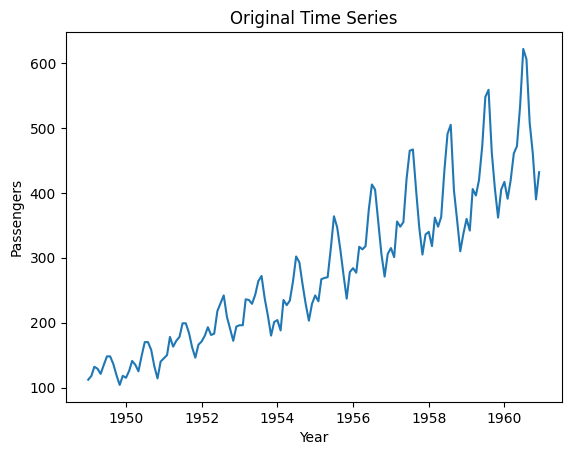

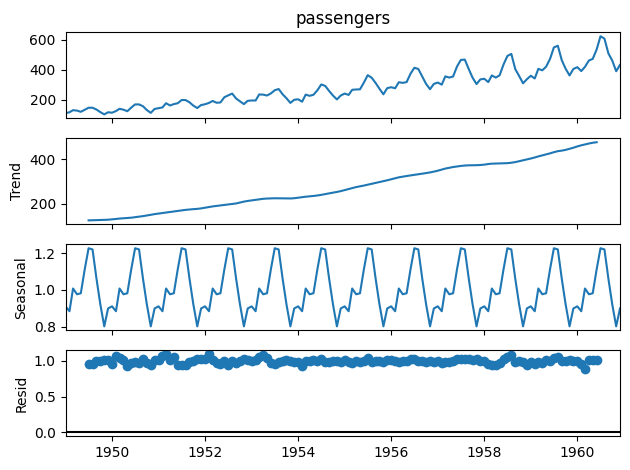

In [3]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Load built-in flights dataset (similar to AirPassengers)
data = sns.load_dataset("flights")

# Create time series
data['Month'] = pd.to_datetime(
    data['year'].astype(str) + '-' + data['month'].astype(str)
)
data.set_index('Month', inplace=True)

# Select passengers column
ts = data['passengers']

# Plot original time series
plt.figure()
plt.plot(ts)
plt.title("Original Time Series")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.show()

# Decompose time series
decomposition = seasonal_decompose(ts, model='multiplicative', period=12)

# Plot decomposition
decomposition.plot()
plt.show()


#Question 7: Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to
#detect anomalies. Visualize the anomalies on a 2D scatter plot.

(Include your Python code and output in the code box below.)

Answer:


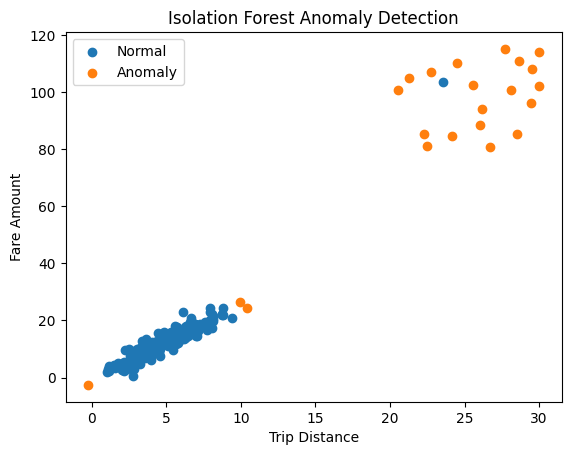

In [4]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Create a sample numerical dataset (similar to NYC Taxi Fare)
np.random.seed(42)

# Normal data (trip distance vs fare)
distance = np.random.normal(5, 2, 200)
fare = distance * 2.5 + np.random.normal(0, 2, 200)

# Add anomalies
distance_anom = np.random.uniform(20, 30, 20)
fare_anom = np.random.uniform(80, 120, 20)

# Combine data
distance = np.concatenate([distance, distance_anom])
fare = np.concatenate([fare, fare_anom])

data = pd.DataFrame({
    "distance": distance,
    "fare": fare
})

# Apply Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
data["anomaly"] = iso_forest.fit_predict(data)

# Separate normal and anomaly points
normal = data[data["anomaly"] == 1]
anomaly = data[data["anomaly"] == -1]

# Scatter plot
plt.figure()
plt.scatter(normal["distance"], normal["fare"], label="Normal")
plt.scatter(anomaly["distance"], anomaly["fare"], label="Anomaly")
plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount")
plt.title("Isolation Forest Anomaly Detection")
plt.legend()
plt.show()


#Question 8: Train a SARIMA model on the monthly airline passengers dataset.
#Forecast the next 12 months and visualize the results.

(Include your Python code and output in the code box below.)

#Answer:-

/tmp/ipython-input-968313511.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Month'] = pd.to_datetime(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


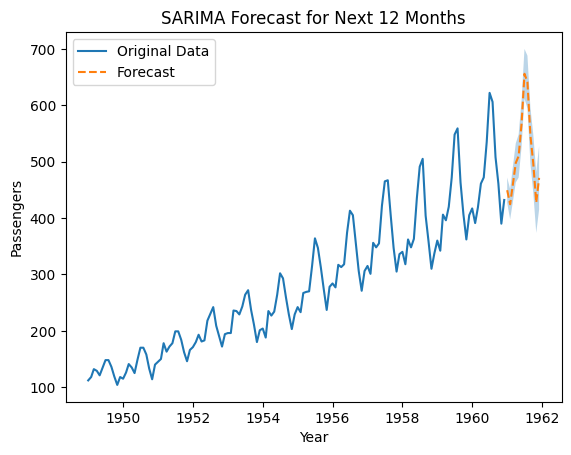

In [5]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load built-in flights dataset (monthly airline passengers)
data = sns.load_dataset("flights")

# Create datetime index
data['Month'] = pd.to_datetime(
    data['year'].astype(str) + '-' + data['month'].astype(str)
)
data.set_index('Month', inplace=True)

# Time series
ts = data['passengers']

# Train SARIMA model
# (p,d,q) = (1,1,1), (P,D,Q,s) = (1,1,1,12)
model = SARIMAX(
    ts,
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 12)
)
results = model.fit(disp=False)

# Forecast next 12 months
forecast = results.get_forecast(steps=12)
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot original data and forecast
plt.figure()
plt.plot(ts, label="Original Data")
plt.plot(forecast_mean, label="Forecast", linestyle='--')
plt.fill_between(
    conf_int.index,
    conf_int.iloc[:, 0],
    conf_int.iloc[:, 1],
    alpha=0.3
)
plt.title("SARIMA Forecast for Next 12 Months")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.legend()
plt.show()


#Question 9: Apply Local Outlier Factor (LOF) on any numerical dataset to detect
#anomalies and visualize them using matplotlib
.
(Include your Python code and output in the code box below.)

**Answer:**->

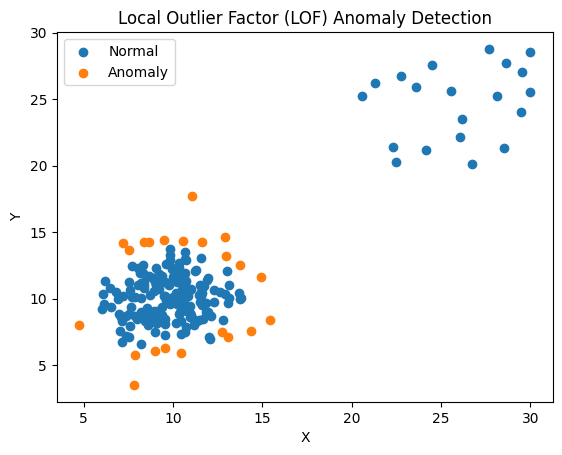

In [6]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Create a numerical dataset
np.random.seed(42)

# Normal data
x_normal = np.random.normal(10, 2, 200)
y_normal = np.random.normal(10, 2, 200)

# Anomalies
x_anom = np.random.uniform(20, 30, 20)
y_anom = np.random.uniform(20, 30, 20)

# Combine data
x = np.concatenate([x_normal, x_anom])
y = np.concatenate([y_normal, y_anom])

data = pd.DataFrame({
    "X": x,
    "Y": y
})

# Apply Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
data["anomaly"] = lof.fit_predict(data)

# Separate normal and anomaly points
normal = data[data["anomaly"] == 1]
anomaly = data[data["anomaly"] == -1]

# Visualize anomalies
plt.figure()
plt.scatter(normal["X"], normal["Y"], label="Normal")
plt.scatter(anomaly["X"], anomaly["Y"], label="Anomaly")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Local Outlier Factor (LOF) Anomaly Detection")
plt.legend()
plt.show()


#Question 10: You are working as a data scientist for a power grid monitoring company.
Your goal is to forecast energy demand and also detect abnormal spikes or drops in
real-time consumption data collected every 15 minutes. The dataset includes features
like timestamp, region, weather conditions, and energy usage.
Explain your real-time data science workflow:

● How would you detect anomalies in this streaming data (Isolation Forest / LOF /
DBSCAN)?

● Which time series model would you use for short-term forecasting (ARIMA /
SARIMA / SARIMAX)?

● How would you validate and monitor the performance over time?

● How would this solution help business decisions or operations?


#Answer :-1. Anomaly Detection in Streaming Data

For real-time anomaly detection, I would primarily use Isolation Forest.

**Reason:**

It is an unsupervised algorithm, so no labeled anomalies are required.

It scales well with high-frequency streaming data.

It is effective in detecting sudden spikes or drops in energy consumption.

**Process:**

Train the model on historical “normal” consumption data.

As new 15-minute interval data arrives, generate anomaly scores.

If the score crosses a threshold, trigger alerts for abnormal behavior.

(LOF and DBSCAN are less suitable because they are computationally expensive and better suited for batch processing rather than real-time streaming.)

**2. Short-Term Energy Demand Forecasting**

For short-term forecasting, I would use SARIMAX.

**Reason:**

Energy demand shows strong daily and weekly seasonality.

Weather conditions significantly impact energy usage.

SARIMAX allows inclusion of external variables such as temperature, humidity, and region.

**Inputs:**

Historical energy consumption

Time-based features (hour, day, weekday/weekend)

Weather data

#**3. Validation and Performance Monitoring**

Validation:

Use time-based train-test splits.

Evaluate performance using MAE, RMSE, and MAPE.

Monitoring:

Continuously track prediction errors in real time.

Detect data or concept drift if errors increase consistently.

Retrain models periodically to maintain accuracy.

Monitor anomaly alerts to reduce false positives.

#**4. Business and Operational Impact**

This solution helps the business by:

Detecting abnormal consumption patterns early to prevent outages.

Improving demand-supply planning and grid reliability.

Reducing operational costs and energy wastage.
